In [1]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit


from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from scipy.stats import norm

In [2]:
ini_fileName =   '/Users/saravannah/Axion-MCMC/axion_MCMC/Oct-22-runs/Oct-22_cumulative.txt'  #'/Users/saravannah/Axion-MCMC/axion_MCMC/Misc_chains/chain_8-31.txt'
log10_axion_ac, log10_fraction_axion_ac, omega_cdm, H0, Djs = np.loadtxt(ini_fileName, unpack = True)
#np.loadtxt('/Users/saravannah/Axion-MCMC/axion_MCMC/vary_ac_fEDE_wCDM.txt', unpack = True)

In [3]:
#params = {'log10_axion_ac':0, 'log10_fraction_axion_ac':1, 'omega_cdm':2, 'H0':3}
params = [10**log10_fraction_axion_ac,log10_axion_ac, H0, omega_cdm ]#[log10_axion_ac, log10_fraction_axion_ac, omega_cdm, H0]
par_names = ['fEDE(a_c)', 'log_10(a_c)', 'H0', 'omega_CDM']#['log10_axion_ac', 'log10_fraction_axion_ac', 'omega_cdm', 'H0']

In [4]:
mus = np.zeros(len(params))
sigmas = np.zeros(len(params))
for _ in range(len(params)):
    mus[_], sigmas[_] = norm.fit(params[_])

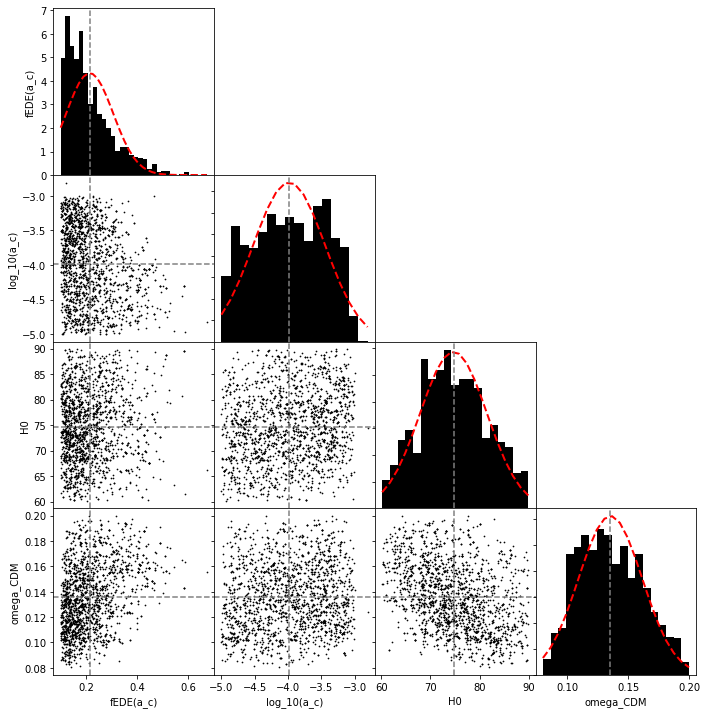

In [5]:
fig, axs = plt.subplots(4,4, figsize=(10,10), gridspec_kw = {'wspace':0, 'hspace':0})


cmap = plt.get_cmap('PiYG')
norm = colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,vmin=0.0, vmax=2) #BoundaryNorm(levels, ncolors=cmap.N, clip=True)

for rows in range(len(params)):
    for cols in range(len(params)):
        if rows == cols:
            #axs[rows,cols].scatter(params[rows], Djs)
            n, bins, patches = axs[rows,cols].hist(params[rows], bins='auto', density=1, color='black')
            y = sp.stats.norm.pdf(bins, mus[rows], sigmas[rows])
            l = axs[rows,cols].plot(bins, y, 'r--', linewidth=2)
            axs[rows,cols].axvline(x=mus[cols], linestyle='dashed', color='gray')
            
        if cols < rows:
            #infuriatingly, the (x,y) for subplots is backwards - it's (rows, cols) or (y,x)
            axs[rows,cols].scatter(params[cols], params[rows], color='black', s=0.5)
            
            axs[rows,cols].axvline(x=mus[cols], linestyle='dashed', color='gray')
            axs[rows,cols].axhline(y=mus[rows], linestyle='dashed', color='gray')
            
        if cols > rows:
            axs[rows][cols].axis('off')

for rows in range(len(params)):
    for cols in range(len(params)):
        if cols == 0:
            axs[rows,cols].set_ylabel(par_names[rows])
        if rows == 3:
            axs[rows,cols].set_xlabel(par_names[cols])
        if cols > 0:
            axs[rows,cols].set_yticklabels([])
        if rows < 3: 
            axs[rows,cols].set_xticklabels([])
            
#fig.colorbar(im, ax=axs[2][3])           
plt.tight_layout()

#plt.savefig('n=3_triangle_v1.png')

In [ ]:
for i in range()